# **Data Pre-processing**

### **Import Libraries**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_samples, silhouette_score, adjusted_rand_score, accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Circle, Ellipse

import numpy as np
import pandas as pd
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Load Dataset**

In [46]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Global_cleaned.csv')
data.head()

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,slice Type
0,34393.0,24.0,0.133023,0.133023,0.133023,0.133023,0.133023,0.133023,0.0,0.0,...,30.069990,1635.0,879.0,3.278968e+09,4.135953e+09,0.000000,0.000000,0.000000,247547.0,3
1,727022.0,250.0,0.001092,0.001092,0.001092,0.001092,0.001092,0.001092,0.0,0.0,...,0.000000,68096.0,31104.0,6.108380e+08,1.659091e+09,0.079877,0.041040,0.038837,350131.0,3
2,693697.0,1959.0,0.014081,0.014081,0.014081,0.014081,0.014081,0.014081,0.0,0.0,...,71.017685,97792.0,31104.0,3.649189e+09,1.482432e+09,0.012972,0.000953,0.012019,100319.0,3
3,22844.0,14.0,0.132893,0.132893,0.132893,0.132893,0.132893,0.132893,0.0,0.0,...,30.099403,1751.0,947.0,1.882601e+08,4.396569e+08,0.000000,0.000000,0.000000,231497.0,3
4,36309.0,7.0,3.521330,3.521330,3.521330,3.521330,3.521330,3.521330,0.0,0.0,...,7.099590,4094.0,5549.0,1.094324e+09,3.441728e+09,0.000000,0.000000,0.000000,197655.0,3


### **Class Distribution Analysis**

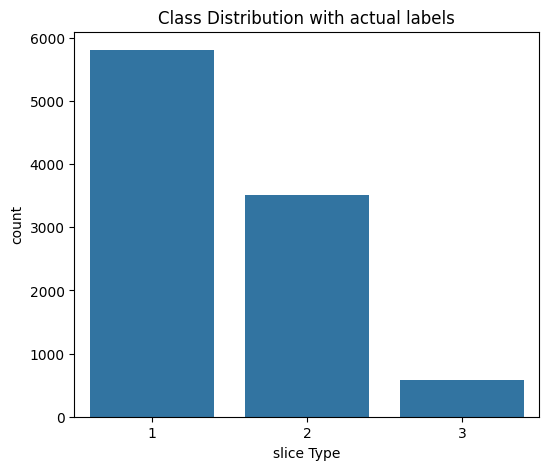

In [47]:
plt.figure(figsize=(6, 5))
sns.countplot(x=data['slice Type'])
plt.title('Class Distribution with actual labels')
plt.show()

#### **Experiment 15 with undersampling**

Activate this section of Experiment 15 when willing to perform undersampling before proceeding with the further steps.

In [48]:
# Identify the majority class
majority_class1 = data['slice Type'].value_counts().idxmax()
# Count the number of data points in the majority class
majority_count1 = data['slice Type'].value_counts()[majority_class1]

# Identify the second majority class
temp_data = data[data['slice Type'] != majority_class1]
majority_class2 = temp_data['slice Type'].value_counts().idxmax()
# Count the number of data points in the second majority class
majority_count2 = temp_data['slice Type'].value_counts()[majority_class2]

# Count the number of data points in the minority class
minority_count = data['slice Type'].value_counts().min()

# Calculate the number of data points to remove from the majority class
num_to_remove1 = majority_count1 - minority_count
num_to_remove2 = majority_count2 - minority_count

# Randomly select data points from the majority class to remove
majority_indices1 = data[data['slice Type'] == majority_class1].index
remove_indices1 = np.random.choice(majority_indices1, size=num_to_remove1, replace=False)
majority_indices2 = data[data['slice Type'] == majority_class2].index
remove_indices2 = np.random.choice(majority_indices2, size=num_to_remove2, replace=False)
remove_indices = np.concatenate((remove_indices1, remove_indices2))

# Remove the selected data points from the DataFrame
balanced_data = data.drop(remove_indices)

In [49]:
data = balanced_data
data.head()

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,slice Type
0,34393.0,24.0,0.133023,0.133023,0.133023,0.133023,0.133023,0.133023,0.0,0.0,...,30.069990,1635.0,879.0,3.278968e+09,4.135953e+09,0.000000,0.000000,0.000000,247547.0,3
1,727022.0,250.0,0.001092,0.001092,0.001092,0.001092,0.001092,0.001092,0.0,0.0,...,0.000000,68096.0,31104.0,6.108380e+08,1.659091e+09,0.079877,0.041040,0.038837,350131.0,3
2,693697.0,1959.0,0.014081,0.014081,0.014081,0.014081,0.014081,0.014081,0.0,0.0,...,71.017685,97792.0,31104.0,3.649189e+09,1.482432e+09,0.012972,0.000953,0.012019,100319.0,3
3,22844.0,14.0,0.132893,0.132893,0.132893,0.132893,0.132893,0.132893,0.0,0.0,...,30.099403,1751.0,947.0,1.882601e+08,4.396569e+08,0.000000,0.000000,0.000000,231497.0,3
4,36309.0,7.0,3.521330,3.521330,3.521330,3.521330,3.521330,3.521330,0.0,0.0,...,7.099590,4094.0,5549.0,1.094324e+09,3.441728e+09,0.000000,0.000000,0.000000,197655.0,3


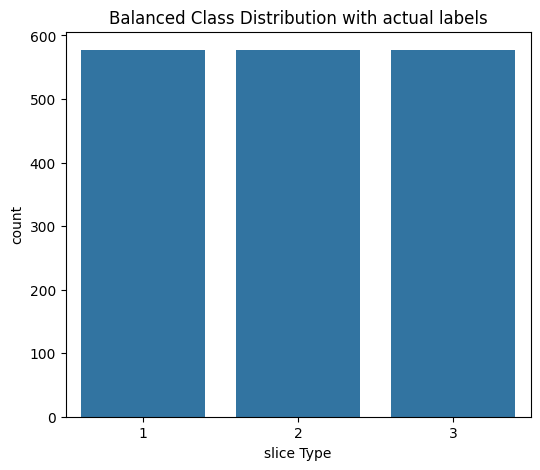

In [50]:
plt.figure(figsize=(6, 5))
sns.countplot(x=data['slice Type'])
plt.title('Balanced Class Distribution with actual labels')
plt.show()

### **Define X and y**

In [51]:
X = data.drop(columns=['slice Type'])
X

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,SrcRate,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID
0,34393.000000,24.000000,0.133023,0.133023,0.133023,0.133023,0.133023,0.133023,0.0,0.0,...,30.069990,30.069990,1635.0,879.0,3.278968e+09,4.135953e+09,0.000000,0.000000,0.000000,2.475470e+05
1,727022.000000,250.000000,0.001092,0.001092,0.001092,0.001092,0.001092,0.001092,0.0,0.0,...,0.000000,0.000000,68096.0,31104.0,6.108380e+08,1.659091e+09,0.079877,0.041040,0.038837,3.501310e+05
2,693697.000000,1959.000000,0.014081,0.014081,0.014081,0.014081,0.014081,0.014081,0.0,0.0,...,142.035370,71.017685,97792.0,31104.0,3.649189e+09,1.482432e+09,0.012972,0.000953,0.012019,1.003190e+05
3,22844.000000,14.000000,0.132893,0.132893,0.132893,0.132893,0.132893,0.132893,0.0,0.0,...,30.099403,30.099403,1751.0,947.0,1.882601e+08,4.396569e+08,0.000000,0.000000,0.000000,2.314970e+05
4,36309.000000,7.000000,3.521330,3.521330,3.521330,3.521330,3.521330,3.521330,0.0,0.0,...,5.111705,7.099590,4094.0,5549.0,1.094324e+09,3.441728e+09,0.000000,0.000000,0.000000,1.976550e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9880,583632.662699,4071.970366,1.395070,1.384611,1.053339,1.292104,1.270225,1.847750,0.0,0.0,...,1.051879,1.574458,64128.0,65024.0,7.061805e+08,2.905999e+09,0.003352,0.001740,0.005095,2.367106e+06
9884,640447.730733,3465.385367,1.822576,1.404116,1.553708,1.415037,1.377559,1.731132,0.0,0.0,...,0.980727,1.216033,64128.0,65024.0,7.061805e+08,2.905999e+09,0.009547,0.001700,0.007254,2.270060e+06
9885,575355.872917,4630.039503,1.255421,1.376180,1.667072,1.184021,1.300572,1.644478,0.0,0.0,...,1.028511,1.168171,64128.0,65024.0,7.061805e+08,2.905999e+09,0.006588,0.001606,0.007471,2.333733e+06
9888,455254.555047,286.143780,4.129712,3.883538,4.481826,4.041967,4.078375,4.580849,0.0,0.0,...,1.951027,1.476129,64256.0,64896.0,1.202037e+09,1.485176e+08,0.152424,0.619438,0.017190,2.379631e+06


In [52]:
features = X.columns.tolist()
features
print(len(features))

43


In [53]:
y = data['slice Type']
y

0       3
1       3
2       3
3       3
4       3
       ..
9880    2
9884    2
9885    2
9888    2
9893    2
Name: slice Type, Length: 1731, dtype: int64

In [54]:
np.unique(y)

array([1, 2, 3])

### **Ground Truth Calculation**

#### **Ground Truth Slice 1**

In [55]:
# Group data by label "slice 0"
grouped_data_slice1 = data[data['slice Type'] == 1]
grouped_data_slice1

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,slice Type
904,520519.000000,903.000000,1.414991,1.414991,1.414991,1.414991,1.414991,1.414991,0.0,0.0,...,11.307492,109056.0,70400.0,2.972475e+09,9.885965e+07,0.039910,0.021181,0.018729,2.108503e+06,1
907,529719.000000,4156.000000,4.887135,4.887135,4.887135,4.887135,4.887135,4.887135,0.0,0.0,...,21.280361,1455104.0,108544.0,3.818173e+09,2.604587e+09,0.048904,0.020681,0.028223,2.231019e+06,1
921,422189.924415,4204.005080,0.628290,0.544308,0.454763,0.629533,0.402537,0.205103,0.0,0.0,...,28.793759,56448.0,64896.0,1.761460e+09,1.223059e+09,0.032470,0.001715,0.020276,5.307994e+05,1
928,550166.451243,1476.477831,0.562234,0.637998,0.607701,0.414245,0.562674,0.582750,0.0,0.0,...,13.179443,56448.0,64896.0,1.761460e+09,1.223059e+09,0.019783,0.001329,0.018166,4.252566e+05,1
936,368435.319216,5183.182420,0.516219,0.206191,0.345913,0.575249,0.572528,0.415119,0.0,0.0,...,23.497183,56448.0,64896.0,1.761460e+09,1.223059e+09,0.026511,0.002902,0.026696,4.617922e+05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6615,610509.646919,16645.313167,0.740776,0.740790,0.740769,0.740786,0.740792,0.740780,0.0,0.0,...,14.429678,56192.0,64768.0,3.408647e+09,3.433226e+09,0.019705,0.002170,0.017502,1.841674e+06,1
6621,610509.816626,16645.246908,0.740793,0.740771,0.740775,0.740791,0.740781,0.740767,0.0,0.0,...,13.733169,56192.0,64768.0,3.408647e+09,3.433226e+09,0.019705,0.002112,0.017529,1.543808e+06,1
6622,610509.849312,16645.785227,0.740769,0.740774,0.740793,0.740793,0.740772,0.740769,0.0,0.0,...,14.603659,56192.0,64768.0,3.408647e+09,3.433226e+09,0.019705,0.002195,0.017511,2.329662e+06,1
6641,611185.939945,16951.052997,0.708222,0.495062,0.339677,0.612259,0.657382,0.681849,0.0,0.0,...,34.101038,56192.0,64768.0,3.408647e+09,3.433226e+09,0.020465,0.002071,0.019855,2.258419e+06,1


In [56]:
# Create 14-dimensional vectors
grouped_data_slice1_vec = grouped_data_slice1[features].values
grouped_data_slice1_vec

array([[5.20519000e+05, 9.03000000e+02, 1.41499100e+00, ...,
        2.11810000e-02, 1.87290000e-02, 2.10850300e+06],
       [5.29719000e+05, 4.15600000e+03, 4.88713500e+00, ...,
        2.06810000e-02, 2.82230000e-02, 2.23101900e+06],
       [4.22189924e+05, 4.20400508e+03, 6.28290000e-01, ...,
        1.71500000e-03, 2.02760000e-02, 5.30799362e+05],
       ...,
       [6.10509849e+05, 1.66457852e+04, 7.40769000e-01, ...,
        2.19500000e-03, 1.75110000e-02, 2.32966189e+06],
       [6.11185940e+05, 1.69510530e+04, 7.08222000e-01, ...,
        2.07100000e-03, 1.98550000e-02, 2.25841879e+06],
       [6.10511041e+05, 1.66463987e+04, 7.33948000e-01, ...,
        1.65100000e-03, 1.92490000e-02, 1.69471103e+06]])

In [57]:
# Calculate Average
GT_slice1 = np.mean(grouped_data_slice1_vec, axis=0)
GT_slice1

array([5.09548917e+05, 1.42448028e+04, 1.61492086e+00, 1.60781822e+00,
       1.63229722e+00, 1.58861508e+00, 1.62663725e+00, 1.62537145e+00,
       0.00000000e+00, 0.00000000e+00, 6.33830156e+01, 7.69809359e+01,
       6.16984402e-01, 6.58925477e+00, 1.02692954e+02, 4.01567770e+01,
       5.95524909e+01, 8.85382014e+04, 6.50259929e+03, 8.25823242e+04,
       7.89698392e+06, 1.19521986e+02, 1.12948604e+03, 3.93899667e+05,
       2.74695661e+04, 3.67303063e+05, 1.04346749e+00, 1.91810049e-01,
       8.62686913e-01, 3.47073499e+00, 0.00000000e+00, 0.00000000e+00,
       6.81439476e+01, 2.81358928e+01, 3.71975708e+01, 5.79792236e+04,
       6.65963813e+04, 1.86714534e+09, 2.34209764e+09, 2.98511404e-02,
       1.00169237e-02, 2.01809636e-02, 1.26656215e+06])

#### **Ground Truth Slice 2**

In [58]:
# Group data by label "slice 0"
grouped_data_slice2 = data[data['slice Type'] == 2]
grouped_data_slice2

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,slice Type
578,728205.000000,865.000000,4.974090,4.974090,4.974090,4.974090,4.974090,4.974090,0.0,0.0,...,2.613543,182.0,134.0,2.043687e+09,1.618367e+09,0.000000,0.000000,0.000000,6.429000e+03,2
586,678830.000000,7481.000000,0.190062,0.190062,0.190062,0.190062,0.190062,0.190062,0.0,0.0,...,78.921616,102912.0,154624.0,2.629176e+09,3.797000e+09,0.034974,0.021213,0.013761,4.623500e+04,2
608,43565.000000,4637.000000,4.943390,4.943390,4.943390,4.943390,4.943390,4.943390,0.0,0.0,...,12.339710,420352.0,87552.0,2.929279e+09,2.286858e+09,0.036054,0.021837,0.014217,2.119390e+05,2
610,521617.000000,1837.000000,4.803965,4.803965,4.803965,4.803965,4.803965,4.803965,0.0,0.0,...,2.706098,97792.0,67840.0,1.950633e+09,4.236896e+09,0.050223,0.021312,0.028911,2.218050e+05,2
611,2132.000000,20.000000,0.636942,0.636942,0.636942,0.636942,0.636942,0.636942,0.0,0.0,...,7.850008,621.0,457.0,1.881998e+08,4.395711e+08,0.000000,0.000000,0.000000,2.294460e+05,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9880,583632.662699,4071.970366,1.395070,1.384611,1.053339,1.292104,1.270225,1.847750,0.0,0.0,...,1.574458,64128.0,65024.0,7.061805e+08,2.905999e+09,0.003352,0.001740,0.005095,2.367106e+06,2
9884,640447.730733,3465.385367,1.822576,1.404116,1.553708,1.415037,1.377559,1.731132,0.0,0.0,...,1.216033,64128.0,65024.0,7.061805e+08,2.905999e+09,0.009547,0.001700,0.007254,2.270060e+06,2
9885,575355.872917,4630.039503,1.255421,1.376180,1.667072,1.184021,1.300572,1.644478,0.0,0.0,...,1.168171,64128.0,65024.0,7.061805e+08,2.905999e+09,0.006588,0.001606,0.007471,2.333733e+06,2
9888,455254.555047,286.143780,4.129712,3.883538,4.481826,4.041967,4.078375,4.580849,0.0,0.0,...,1.476129,64256.0,64896.0,1.202037e+09,1.485176e+08,0.152424,0.619438,0.017190,2.379631e+06,2


In [59]:
# Create 14-dimensional vectors
grouped_data_slice2_vec = grouped_data_slice2[features].values
grouped_data_slice2_vec

array([[7.28205000e+05, 8.65000000e+02, 4.97409000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.42900000e+03],
       [6.78830000e+05, 7.48100000e+03, 1.90062000e-01, ...,
        2.12130000e-02, 1.37610000e-02, 4.62350000e+04],
       [4.35650000e+04, 4.63700000e+03, 4.94339000e+00, ...,
        2.18370000e-02, 1.42170000e-02, 2.11939000e+05],
       ...,
       [5.75355873e+05, 4.63003950e+03, 1.25542100e+00, ...,
        1.60600000e-03, 7.47100000e-03, 2.33373290e+06],
       [4.55254555e+05, 2.86143780e+02, 4.12971200e+00, ...,
        6.19438000e-01, 1.71900000e-02, 2.37963139e+06],
       [4.55246516e+05, 2.60473050e+02, 4.22050700e+00, ...,
        7.68704000e-01, 2.55850000e-02, 2.33587202e+06]])

In [60]:
# Calculate Average
GT_slice2 = np.mean(grouped_data_slice2_vec, axis=0)
GT_slice2

array([4.63069722e+05, 1.60053515e+03, 3.27955634e+00, 3.29873853e+00,
       3.26918420e+00, 3.30427119e+00, 3.28375395e+00, 3.30201650e+00,
       0.00000000e+00, 0.00000000e+00, 6.33951473e+01, 6.75753899e+01,
       6.04852686e-01, 5.08145581e+00, 2.65409350e+01, 1.36720715e+01,
       1.25141535e+01, 6.84142353e+03, 2.98090228e+03, 4.05284309e+03,
       6.83131696e+05, 1.70296467e+02, 1.83434392e+02, 3.12960704e+04,
       7.86131531e+03, 2.54061246e+04, 3.90635335e+00, 2.05997393e+00,
       1.79717365e+00, 1.19104010e+01, 0.00000000e+00, 0.00000000e+00,
       1.06086076e+01, 5.27418207e+00, 4.90523217e+00, 5.67489601e+04,
       6.82558752e+04, 1.69662640e+09, 2.63954261e+09, 1.27932626e-01,
       1.10520724e-01, 2.23316950e-02, 1.25374526e+06])

#### **Ground Truth Slice 3**

In [61]:
# Group data by label "slice 0"
grouped_data_slice3 = data[data['slice Type'] == 3]
grouped_data_slice3

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,slice Type
0,34393.0,24.0,0.133023,0.133023,0.133023,0.133023,0.133023,0.133023,0.0,0.0,...,30.069990,1635.0,879.0,3.278968e+09,4.135953e+09,0.000000,0.000000,0.000000,247547.0,3
1,727022.0,250.0,0.001092,0.001092,0.001092,0.001092,0.001092,0.001092,0.0,0.0,...,0.000000,68096.0,31104.0,6.108380e+08,1.659091e+09,0.079877,0.041040,0.038837,350131.0,3
2,693697.0,1959.0,0.014081,0.014081,0.014081,0.014081,0.014081,0.014081,0.0,0.0,...,71.017685,97792.0,31104.0,3.649189e+09,1.482432e+09,0.012972,0.000953,0.012019,100319.0,3
3,22844.0,14.0,0.132893,0.132893,0.132893,0.132893,0.132893,0.132893,0.0,0.0,...,30.099403,1751.0,947.0,1.882601e+08,4.396569e+08,0.000000,0.000000,0.000000,231497.0,3
4,36309.0,7.0,3.521330,3.521330,3.521330,3.521330,3.521330,3.521330,0.0,0.0,...,7.099590,4094.0,5549.0,1.094324e+09,3.441728e+09,0.000000,0.000000,0.000000,197655.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,579065.0,5594.0,0.236943,0.236943,0.236943,0.236943,0.236943,0.236943,0.0,0.0,...,0.000000,56832.0,64768.0,5.900751e+08,2.026363e+09,0.020975,0.001854,0.019121,291102.0,3
573,589767.0,10619.0,4.038035,4.038035,4.038035,4.038035,4.038035,4.038035,0.0,0.0,...,2.476452,56704.0,64640.0,3.919933e+09,2.034093e+09,0.029116,0.002302,0.026814,378706.0,3
574,717722.0,9601.0,4.683304,4.683304,4.683304,4.683304,4.683304,4.683304,0.0,0.0,...,1.281147,64128.0,65024.0,1.137856e+08,2.138049e+09,0.015086,0.001336,0.013750,234224.0,3
575,412598.0,30013.0,4.948556,4.948556,4.948556,4.948556,4.948556,4.948556,0.0,0.0,...,1.818712,56960.0,64768.0,1.970008e+09,4.066242e+08,0.017790,0.002793,0.014997,257702.0,3


In [62]:
# Create 14-dimensional vectors
grouped_data_slice3_vec = grouped_data_slice3[features].values
grouped_data_slice3_vec

array([[3.439300e+04, 2.400000e+01, 1.330230e-01, ..., 0.000000e+00,
        0.000000e+00, 2.475470e+05],
       [7.270220e+05, 2.500000e+02, 1.092000e-03, ..., 4.104000e-02,
        3.883700e-02, 3.501310e+05],
       [6.936970e+05, 1.959000e+03, 1.408100e-02, ..., 9.530000e-04,
        1.201900e-02, 1.003190e+05],
       ...,
       [7.177220e+05, 9.601000e+03, 4.683304e+00, ..., 1.336000e-03,
        1.375000e-02, 2.342240e+05],
       [4.125980e+05, 3.001300e+04, 4.948556e+00, ..., 2.793000e-03,
        1.499700e-02, 2.577020e+05],
       [4.231780e+05, 3.573800e+04, 4.617085e+00, ..., 1.631000e-03,
        5.242300e-02, 2.381880e+05]])

In [63]:
# Calculate Average
GT_slice3 = np.mean(grouped_data_slice3_vec, axis=0)
GT_slice3

array([5.15785147e+05, 1.20977331e+04, 2.24303438e+00, 2.24303438e+00,
       2.24303438e+00, 2.24303438e+00, 2.24303438e+00, 2.24303438e+00,
       0.00000000e+00, 0.00000000e+00, 6.33968804e+01, 5.95632582e+01,
       1.04679376e+00, 4.99133449e+00, 8.79202773e+00, 4.00519931e+00,
       4.78682842e+00, 3.45191854e+03, 4.64419411e+02, 2.98749913e+03,
       5.38196070e+06, 9.55488180e+01, 3.12908611e+02, 1.78256606e+07,
       4.20903771e+05, 1.74047570e+07, 3.29289428e-02, 1.21317158e-02,
       2.07972270e-02, 2.92190281e-01, 0.00000000e+00, 0.00000000e+00,
       2.66878185e+03, 7.89678080e+02, 1.66056875e+03, 2.10146588e+05,
       6.39505165e+04, 2.03919171e+09, 2.02689493e+09, 2.17723518e-02,
       2.05282149e-03, 1.97195303e-02, 2.03183464e+05])

#### **Plot Ground Truth**

In [64]:
# Combine the centroids into a single array
GT_centroids = np.vstack((GT_slice1, GT_slice2, GT_slice3))
GT_centroids

array([[5.09548917e+05, 1.42448028e+04, 1.61492086e+00, 1.60781822e+00,
        1.63229722e+00, 1.58861508e+00, 1.62663725e+00, 1.62537145e+00,
        0.00000000e+00, 0.00000000e+00, 6.33830156e+01, 7.69809359e+01,
        6.16984402e-01, 6.58925477e+00, 1.02692954e+02, 4.01567770e+01,
        5.95524909e+01, 8.85382014e+04, 6.50259929e+03, 8.25823242e+04,
        7.89698392e+06, 1.19521986e+02, 1.12948604e+03, 3.93899667e+05,
        2.74695661e+04, 3.67303063e+05, 1.04346749e+00, 1.91810049e-01,
        8.62686913e-01, 3.47073499e+00, 0.00000000e+00, 0.00000000e+00,
        6.81439476e+01, 2.81358928e+01, 3.71975708e+01, 5.79792236e+04,
        6.65963813e+04, 1.86714534e+09, 2.34209764e+09, 2.98511404e-02,
        1.00169237e-02, 2.01809636e-02, 1.26656215e+06],
       [4.63069722e+05, 1.60053515e+03, 3.27955634e+00, 3.29873853e+00,
        3.26918420e+00, 3.30427119e+00, 3.28375395e+00, 3.30201650e+00,
        0.00000000e+00, 0.00000000e+00, 6.33951473e+01, 6.75753899e+01,
       

In [65]:
# Apply PCA to reduce the dimensionality to 3 dimensions
pca = PCA(n_components=3)
centroids_3d = pca.fit_transform(GT_centroids)
centroids_3d

array([[-5.67483203e+06,  8.78104697e+06,  1.11648768e-07],
       [-3.48349924e+08, -4.49694311e+06,  1.11648768e-07],
       [ 3.54024756e+08, -4.28410386e+06,  1.11648768e-07]])

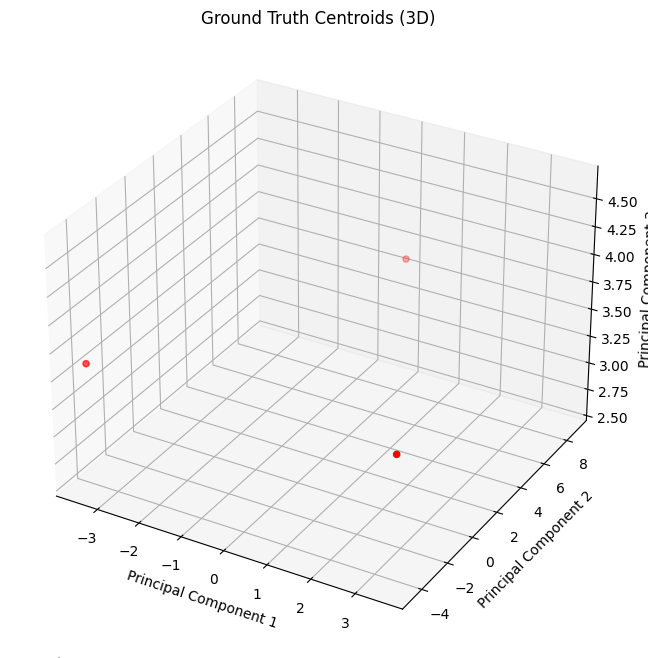

In [66]:
# Plot the centroids in 3D space
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(centroids_3d[:, 0], centroids_3d[:, 1], centroids_3d[:, 2], c='r', marker='o')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.title('Ground Truth Centroids (3D)')
plt.show()

### **Datasplit - X, X_train and X_test**

In [67]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)
X_train

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,SrcRate,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID
876,689993.000000,1031.000000,4.925831,4.925831,4.925831,4.925831,4.925831,4.925831,0.0,0.0,...,1.827103,1.421080,64256.0,64896.0,5.232537e+08,1.478907e+09,0.055964,0.001376,0.054588,2.325016e+06
4148,575664.097704,3500.510668,0.429391,4.296890,0.772022,4.459169,3.990314,4.473886,0.0,0.0,...,29.895583,42.183899,56704.0,64896.0,1.947928e+09,4.287946e+09,0.021414,0.006359,0.015459,1.755728e+05
8942,455211.190782,207.061597,3.658464,3.411520,4.530306,3.720075,3.432971,2.651938,0.0,0.0,...,1.850977,1.244285,64256.0,64896.0,2.020641e+09,4.100044e+09,0.019875,0.001514,0.033707,1.180843e+06
414,403863.000000,26388.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,56832.0,64896.0,2.587157e+09,4.162752e+09,0.049550,0.003752,0.045798,1.069270e+05
420,411366.000000,28603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,62464.0,64768.0,9.217850e+08,2.509655e+09,0.013901,0.001200,0.012701,1.602590e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,610889.747622,16942.635466,0.417905,0.306290,0.571248,0.609639,0.682765,0.296666,0.0,0.0,...,31.011972,15.932838,56192.0,64768.0,1.057933e+09,1.746765e+09,0.028008,0.001434,0.021968,1.708431e+06
7250,5573.829714,1919.742804,3.391270,2.928286,3.060242,2.954811,3.783263,3.408368,0.0,0.0,...,3.376805,1.628186,4094.0,5549.0,1.093519e+09,3.441197e+09,0.050799,0.002222,0.019353,1.037978e+06
3240,217865.763564,3885.948818,4.526731,2.579364,2.926981,4.403180,1.025852,0.991199,0.0,0.0,...,34.571036,32.294891,180.0,77568.0,1.193253e+09,2.646975e+09,0.036802,0.020903,0.013284,2.160178e+06
8209,32104.725331,8.974045,4.578761,4.588589,4.562201,4.575310,4.553548,4.589685,0.0,0.0,...,5.648841,6.164334,4094.0,5549.0,1.093730e+09,3.441334e+09,0.000000,0.000000,0.000000,2.363778e+06


In [68]:
X_test

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,SrcRate,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID
753,664065.000000,2336.000000,1.900381,1.900381,1.900381,1.900381,1.900381,1.900381,0.0,0.0,...,1.578631,2.104841,64128.0,65024.0,1.507043e+09,2.083893e+08,0.014101,0.001774,0.012327,2.722970e+05
6704,727463.609112,483.000000,4.748378,4.785496,4.724801,4.774719,4.763166,4.723923,0.0,0.0,...,6.093112,2.986943,69632.0,68608.0,1.416618e+09,2.623059e+09,0.118435,0.077332,0.041103,4.573082e+03
944,265170.032283,2908.747442,0.524559,0.473608,0.421137,0.309686,0.570626,0.359669,0.0,0.0,...,21.042562,25.155098,56448.0,64896.0,1.761460e+09,1.223059e+09,0.017050,0.001281,0.015020,7.664192e+04
9369,443686.091277,808.705146,1.831012,1.829596,1.827127,1.828619,1.830470,1.833138,0.0,0.0,...,1.461910,2.182375,64128.0,65024.0,2.059474e+08,1.552586e+09,0.014142,0.001501,0.017087,2.046050e+06
7087,485293.383861,200.939184,1.157405,2.695086,1.347506,2.183192,2.427597,1.482041,0.0,0.0,...,3.539081,3.795793,64256.0,64896.0,2.254002e+09,4.073126e+09,0.017406,0.001305,0.002623,2.577615e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6381,636910.271228,25261.122872,0.176700,0.173054,0.190435,0.221300,0.193290,0.178565,0.0,0.0,...,35.032998,48.362855,56704.0,64896.0,2.542816e+09,3.847444e+09,0.017505,0.001596,0.016450,2.222999e+06
7877,34255.215325,9.445688,4.579484,4.607532,4.579670,4.558236,4.646774,4.585187,0.0,0.0,...,5.122358,6.222288,4094.0,5549.0,1.091502e+09,3.439865e+09,0.000000,0.000000,0.000000,2.099369e+06
270,449151.000000,2804.000000,1.971175,1.971175,1.971175,1.971175,1.971175,1.971175,0.0,0.0,...,0.507312,1.014623,64128.0,65024.0,2.467882e+09,2.431782e+09,0.014904,0.001986,0.012918,2.373300e+04
2099,639866.653739,32524.674591,3.397633,2.969728,2.018880,1.323017,1.752522,0.639751,0.0,0.0,...,20.891765,28.481630,56704.0,64896.0,3.025160e+09,2.052664e+09,0.028373,0.012639,0.021379,7.432710e+05


In [69]:
y_train

876     2
4148    1
8942    2
414     3
420     3
       ..
5995    1
7250    2
3240    1
8209    2
5966    1
Name: slice Type, Length: 1557, dtype: int64

In [70]:
y_test

753     2
6704    2
944     1
9369    2
7087    2
       ..
6381    1
7877    2
270     3
2099    1
212     3
Name: slice Type, Length: 174, dtype: int64

# **EDA**

## Pair Plots

In [28]:
# sns.pairplot(X)
# plt.suptitle('Pairwise Scatter Plots', y=1.02)
# plt.show()

In [29]:
# sns.pairplot(X_tsne)
# plt.suptitle('Pairwise Scatter Plots', y=1.02)
# plt.show()

## Heatmaps

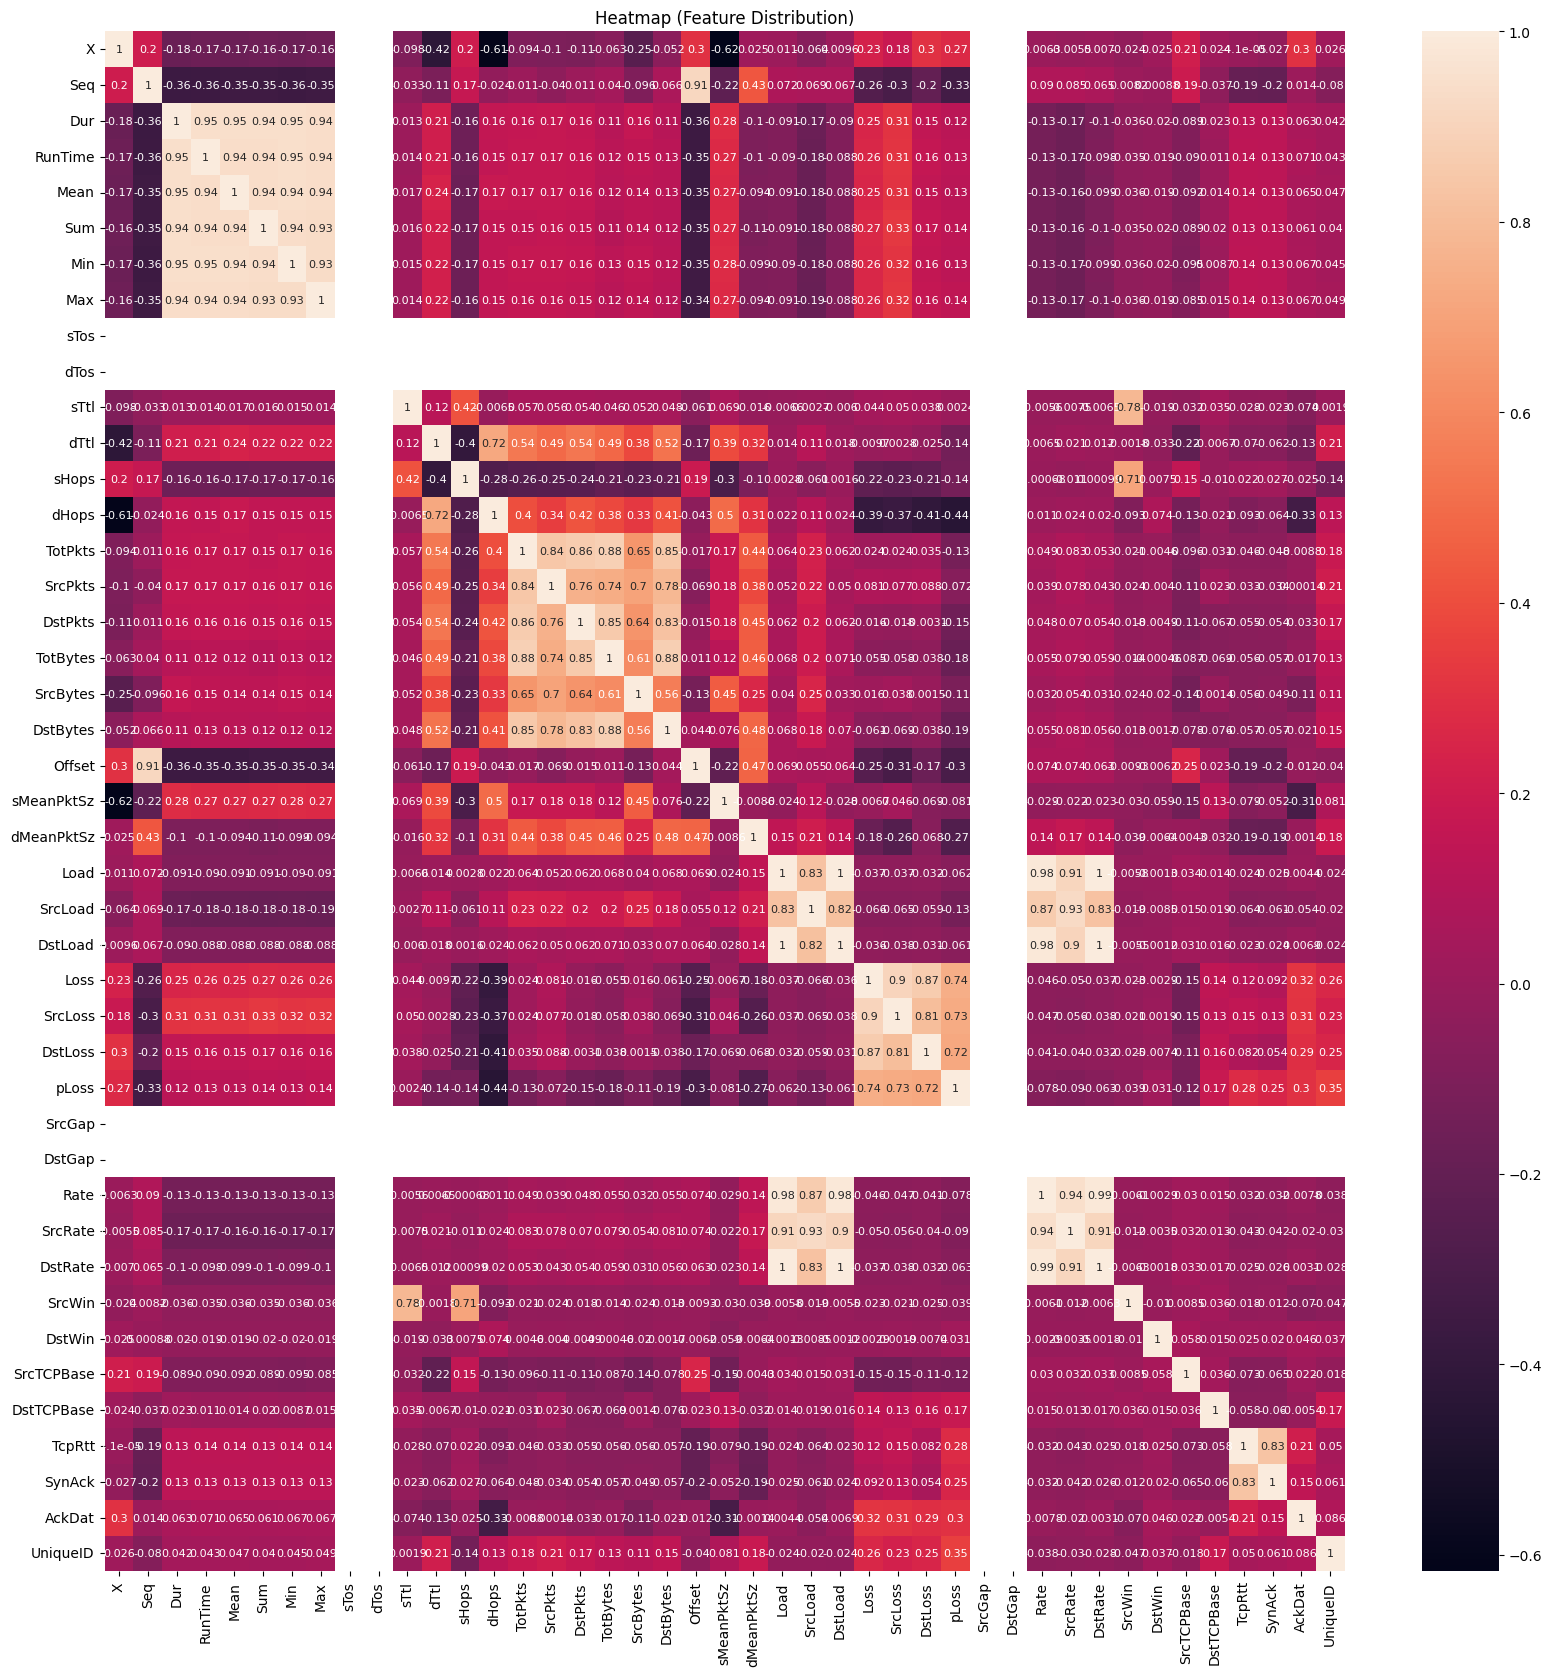

In [71]:
# Create a heatmap for the correlation matrix of all features
plt.figure(figsize=(20, 20))
sns.heatmap(X_train.corr(), annot=True, annot_kws={"size": 8})
plt.title('Heatmap (Feature Distribution)')
plt.show()

# **Data Modelling and Analysis**

## **Model Training**

In [72]:
# Create a KMeans model
kmeans_model = KMeans(n_clusters=3, random_state=42)

# Fit the model to the training data
best_model = kmeans_model.fit(X_train)
best_model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

## **Hyperparameter Tuning**

In [29]:
# # Initialize KMeans model
# kmeans = KMeans()

# # Define hyperparameters to tune
# param_grid = {
#     'init': ['k-means++', 'random'],
#     'n_clusters': [3],
#     'max_iter': [100, 200, 300, 400, 500],
#     # 'tol': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
#     'tol': [1e-6],
#     'algorithm': ['auto', 'full'],
#     # 'n_jobs': [-1],  # Use all available CPU cores
#     'random_state': [42]
# }

# # Perform GridSearchCV for hyperparameter tuning
# grid_search = GridSearchCV(kmeans, param_grid, cv=20, scoring='neg_mean_squared_error')
# grid_search.fit(X_train)

# # Get best hyperparameters and model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# # Print best hyperparameters
# print("\n\nBest Hyperparameters:")
# print(best_params)

# # Print best model
# print("\nBest Model:")
# best_model

## **Model Labels**

In [73]:
kmeans_model_labels = best_model.labels_
kmeans_model_labels

array([2, 1, 1, ..., 1, 1, 2], dtype=int32)

In [74]:
kmeans_model_labels_aligned = kmeans_model_labels + 1
kmeans_model_labels_aligned

array([3, 2, 2, ..., 2, 2, 3], dtype=int32)

In [75]:
len(kmeans_model_labels_aligned)

1557

In [76]:
np.unique(kmeans_model_labels_aligned)

array([1, 2, 3], dtype=int32)

## **Model Centroids**

In [77]:
kmeans_model_centroids = best_model.cluster_centers_
kmeans_model_centroids

array([[5.30861027e+05, 1.12565398e+04, 2.47530533e+00, 2.45543721e+00,
        2.49442864e+00, 2.48902831e+00, 2.46068921e+00, 2.49699795e+00,
        0.00000000e+00, 0.00000000e+00, 6.34502762e+01, 6.45966851e+01,
        9.03314917e-01, 5.38397790e+00, 2.81117265e+01, 1.04479856e+01,
        1.51474662e+01, 1.60511904e+04, 1.38876332e+03, 1.77825921e+04,
        5.94203217e+06, 1.10387018e+02, 4.37410242e+02, 5.38238206e+05,
        1.87419592e+04, 5.24323362e+05, 9.68318671e-01, 4.16792157e-01,
        5.60363254e-01, 3.88229010e+00, 0.00000000e+00, 0.00000000e+00,
        8.96098238e+01, 2.70275544e+01, 5.34420093e+01, 1.67388550e+05,
        8.68801713e+04, 3.37648825e+09, 2.27898893e+09, 4.83219116e-02,
        2.81493066e-02, 2.16606492e-02, 8.53845263e+05],
       [4.86484837e+05, 8.03982982e+03, 2.44256607e+00, 2.44143637e+00,
        2.43360396e+00, 2.44677495e+00, 2.44605846e+00, 2.44277672e+00,
        0.00000000e+00, 0.00000000e+00, 6.34202050e+01, 6.95754026e+01,
       

In [78]:
C1 = kmeans_model_centroids[0]
C1

array([5.30861027e+05, 1.12565398e+04, 2.47530533e+00, 2.45543721e+00,
       2.49442864e+00, 2.48902831e+00, 2.46068921e+00, 2.49699795e+00,
       0.00000000e+00, 0.00000000e+00, 6.34502762e+01, 6.45966851e+01,
       9.03314917e-01, 5.38397790e+00, 2.81117265e+01, 1.04479856e+01,
       1.51474662e+01, 1.60511904e+04, 1.38876332e+03, 1.77825921e+04,
       5.94203217e+06, 1.10387018e+02, 4.37410242e+02, 5.38238206e+05,
       1.87419592e+04, 5.24323362e+05, 9.68318671e-01, 4.16792157e-01,
       5.60363254e-01, 3.88229010e+00, 0.00000000e+00, 0.00000000e+00,
       8.96098238e+01, 2.70275544e+01, 5.34420093e+01, 1.67388550e+05,
       8.68801713e+04, 3.37648825e+09, 2.27898893e+09, 4.83219116e-02,
       2.81493066e-02, 2.16606492e-02, 8.53845263e+05])

In [79]:
C2 = kmeans_model_centroids[1]
C2

array([4.86484837e+05, 8.03982982e+03, 2.44256607e+00, 2.44143637e+00,
       2.43360396e+00, 2.44677495e+00, 2.44605846e+00, 2.44277672e+00,
       0.00000000e+00, 0.00000000e+00, 6.34202050e+01, 6.95754026e+01,
       6.73499268e-01, 5.62371889e+00, 4.77969339e+01, 2.20382334e+01,
       2.43573883e+01, 2.97391575e+04, 3.68215838e+03, 2.62974172e+04,
       4.20984517e+06, 1.48938278e+02, 5.33077451e+02, 1.98611419e+05,
       1.74661337e+04, 1.87298929e+05, 2.35121563e+00, 1.10442247e+00,
       1.23881046e+00, 6.71528272e+00, 0.00000000e+00, 0.00000000e+00,
       4.44919806e+01, 1.78229701e+01, 2.09915705e+01, 1.01567507e+05,
       5.90998404e+04, 1.45186973e+09, 3.45246149e+09, 5.82631069e-02,
       3.66814978e-02, 2.04050849e-02, 1.02318578e+06])

In [80]:
C3 = kmeans_model_centroids[2]
C3

array([4.86533713e+05, 9.67725103e+03, 2.18770190e+00, 2.20889596e+00,
       2.20554693e+00, 2.17435595e+00, 2.22522054e+00, 2.20893594e+00,
       0.00000000e+00, 0.00000000e+00, 6.32480469e+01, 6.83906250e+01,
       7.51953125e-01, 5.55859375e+00, 5.88447495e+01, 2.16749558e+01,
       3.51722209e+01, 4.92765102e+04, 4.23450451e+03, 4.34204821e+04,
       4.45627450e+06, 1.12579026e+02, 6.46244118e+02, 2.32022763e+05,
       1.86221934e+04, 2.05164397e+05, 1.26775107e+00, 5.22493293e-01,
       6.90657807e-01, 4.19832566e+00, 0.00000000e+00, 0.00000000e+00,
       4.81484160e+01, 1.86530070e+01, 2.27204974e+01, 6.12060840e+04,
       6.33132715e+04, 1.34786272e+09, 8.91085579e+08, 6.93025801e-02,
       5.47427383e-02, 2.07223086e-02, 7.84547284e+05])

## **Initialization of an empty array before Centroid Mapping based on Ground Truths**

In [81]:
feature_lists = [features, features, features]
feature_lists

[['X',
  'Seq',
  'Dur',
  'RunTime',
  'Mean',
  'Sum',
  'Min',
  'Max',
  'sTos',
  'dTos',
  'sTtl',
  'dTtl',
  'sHops',
  'dHops',
  'TotPkts',
  'SrcPkts',
  'DstPkts',
  'TotBytes',
  'SrcBytes',
  'DstBytes',
  'Offset',
  'sMeanPktSz',
  'dMeanPktSz',
  'Load',
  'SrcLoad',
  'DstLoad',
  'Loss',
  'SrcLoss',
  'DstLoss',
  'pLoss',
  'SrcGap',
  'DstGap',
  'Rate',
  'SrcRate',
  'DstRate',
  'SrcWin',
  'DstWin',
  'SrcTCPBase',
  'DstTCPBase',
  'TcpRtt',
  'SynAck',
  'AckDat',
  'UniqueID'],
 ['X',
  'Seq',
  'Dur',
  'RunTime',
  'Mean',
  'Sum',
  'Min',
  'Max',
  'sTos',
  'dTos',
  'sTtl',
  'dTtl',
  'sHops',
  'dHops',
  'TotPkts',
  'SrcPkts',
  'DstPkts',
  'TotBytes',
  'SrcBytes',
  'DstBytes',
  'Offset',
  'sMeanPktSz',
  'dMeanPktSz',
  'Load',
  'SrcLoad',
  'DstLoad',
  'Loss',
  'SrcLoss',
  'DstLoss',
  'pLoss',
  'SrcGap',
  'DstGap',
  'Rate',
  'SrcRate',
  'DstRate',
  'SrcWin',
  'DstWin',
  'SrcTCPBase',
  'DstTCPBase',
  'TcpRtt',
  'SynAck',
  '

In [82]:
len(features)

43

In [83]:
# Determine the number of columns (max length of feature lists)
num_columns = max(len(feature_list) for feature_list in feature_lists)
num_columns

43

In [84]:
# Create an empty NumPy array with 3 rows and num_columns columns, filled with 0.0
arr = np.zeros((3, num_columns)).astype(np.float32)
print(arr)
print(arr.dtype)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
float32


## **Minimum Distance of C1 from Ground Truths**

In [85]:
dist_C1_GT_slice1 = np.linalg.norm(C1 - GT_slice1)
dist_C1_GT_slice1

1510663037.031744

In [86]:
dist_C1_GT_slice2 = np.linalg.norm(C1 - GT_slice2)
dist_C1_GT_slice2

1718127803.8003457

In [87]:
dist_C1_GT_slice3 = np.linalg.norm(C1 - GT_slice3)
dist_C1_GT_slice3

1361065073.2327602

In [88]:
# Determine the closest centroid
min_dist_C1 = min(dist_C1_GT_slice1, dist_C1_GT_slice2, dist_C1_GT_slice3)

if min_dist_C1 == dist_C1_GT_slice1:
    closest_centroid_C1 = "Slice 1"
    arr[0] = C1
elif min_dist_C1 == dist_C1_GT_slice2:
    closest_centroid_C1 = "Slice 2"
    arr[0] = C2
else:
    closest_centroid_C1 = "Slice 3"
    arr[0] = C3

print("C1 has minimum distance of ", min_dist_C1, "from the Model's Centroid/Cluster", closest_centroid_C1)
arr

C1 has minimum distance of  1361065073.2327602 from the Model's Centroid/Cluster Slice 3


array([[4.86533719e+05, 9.67725098e+03, 2.18770194e+00, 2.20889592e+00,
        2.20554686e+00, 2.17435598e+00, 2.22522044e+00, 2.20893598e+00,
        0.00000000e+00, 0.00000000e+00, 6.32480469e+01, 6.83906250e+01,
        7.51953125e-01, 5.55859375e+00, 5.88447495e+01, 2.16749554e+01,
        3.51722221e+01, 4.92765117e+04, 4.23450439e+03, 4.34204805e+04,
        4.45627450e+06, 1.12579025e+02, 6.46244141e+02, 2.32022766e+05,
        1.86221934e+04, 2.05164391e+05, 1.26775110e+00, 5.22493303e-01,
        6.90657794e-01, 4.19832563e+00, 0.00000000e+00, 0.00000000e+00,
        4.81484146e+01, 1.86530075e+01, 2.27204971e+01, 6.12060859e+04,
        6.33132734e+04, 1.34786278e+09, 8.91085568e+08, 6.93025813e-02,
        5.47427386e-02, 2.07223091e-02, 7.84547312e+05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       

## **Minimum Distance of C2 from Ground Truths**

In [89]:
dist_C2_GT_slice1 = np.linalg.norm(C2 - GT_slice1)
dist_C2_GT_slice1

1185485314.8758457

In [90]:
dist_C2_GT_slice2 = np.linalg.norm(C2 - GT_slice2)
dist_C2_GT_slice2

848973185.6863544

In [91]:
dist_C2_GT_slice3 = np.linalg.norm(C2 - GT_slice3)
dist_C2_GT_slice3

1542010533.501352

In [92]:
# Determine the closest centroid
min_dist_C2 = min(dist_C2_GT_slice1, dist_C2_GT_slice2, dist_C2_GT_slice3)

if min_dist_C2 == dist_C2_GT_slice1:
    closest_centroid_C2 = "Slice 1"
    arr[1] = C1
elif min_dist_C2 == dist_C2_GT_slice2:
    closest_centroid_C2 = "Slice 2"
    arr[1] = C2
else:
    closest_centroid_C2 = "Slice 3"
    arr[1] = C3

print("C2 has minimum distance of ", min_dist_C2, "from the Model's Centroid/Cluster", closest_centroid_C2)
arr

C2 has minimum distance of  848973185.6863544 from the Model's Centroid/Cluster Slice 2


array([[4.86533719e+05, 9.67725098e+03, 2.18770194e+00, 2.20889592e+00,
        2.20554686e+00, 2.17435598e+00, 2.22522044e+00, 2.20893598e+00,
        0.00000000e+00, 0.00000000e+00, 6.32480469e+01, 6.83906250e+01,
        7.51953125e-01, 5.55859375e+00, 5.88447495e+01, 2.16749554e+01,
        3.51722221e+01, 4.92765117e+04, 4.23450439e+03, 4.34204805e+04,
        4.45627450e+06, 1.12579025e+02, 6.46244141e+02, 2.32022766e+05,
        1.86221934e+04, 2.05164391e+05, 1.26775110e+00, 5.22493303e-01,
        6.90657794e-01, 4.19832563e+00, 0.00000000e+00, 0.00000000e+00,
        4.81484146e+01, 1.86530075e+01, 2.27204971e+01, 6.12060859e+04,
        6.33132734e+04, 1.34786278e+09, 8.91085568e+08, 6.93025813e-02,
        5.47427386e-02, 2.07223091e-02, 7.84547312e+05],
       [4.86484844e+05, 8.03982959e+03, 2.44256616e+00, 2.44143629e+00,
        2.43360400e+00, 2.44677496e+00, 2.44605851e+00, 2.44277668e+00,
        0.00000000e+00, 0.00000000e+00, 6.34202042e+01, 6.95754013e+01,
       

## **Minimum Distance of C3 from Ground Truths**

In [93]:
dist_C3_GT_slice1 = np.linalg.norm(C3 - GT_slice1)
dist_C3_GT_slice1

1541136777.3572745

In [94]:
dist_C3_GT_slice2 = np.linalg.norm(C3 - GT_slice2)
dist_C3_GT_slice2

1782905672.9942062

In [95]:
dist_C3_GT_slice3 = np.linalg.norm(C3 - GT_slice3)
dist_C3_GT_slice3

1329889244.7064302

In [96]:
# Determine the closest centroid
min_dist_C3 = min(dist_C3_GT_slice1, dist_C3_GT_slice2, dist_C3_GT_slice3)

if min_dist_C3 == dist_C3_GT_slice1:
    closest_centroid_C3 = "Slice 1"
    arr[2] = C1
elif min_dist_C3 == dist_C3_GT_slice2:
    closest_centroid_C3 = "Slice 2"
    arr[2] = C2
else:
    closest_centroid_C3 = "Slice 3"
    arr[2] = C3

print("C3 has minimum distance of ", min_dist_C3, "from the Model's Centroid/Cluster", closest_centroid_C3)
arr

C3 has minimum distance of  1329889244.7064302 from the Model's Centroid/Cluster Slice 3


array([[4.86533719e+05, 9.67725098e+03, 2.18770194e+00, 2.20889592e+00,
        2.20554686e+00, 2.17435598e+00, 2.22522044e+00, 2.20893598e+00,
        0.00000000e+00, 0.00000000e+00, 6.32480469e+01, 6.83906250e+01,
        7.51953125e-01, 5.55859375e+00, 5.88447495e+01, 2.16749554e+01,
        3.51722221e+01, 4.92765117e+04, 4.23450439e+03, 4.34204805e+04,
        4.45627450e+06, 1.12579025e+02, 6.46244141e+02, 2.32022766e+05,
        1.86221934e+04, 2.05164391e+05, 1.26775110e+00, 5.22493303e-01,
        6.90657794e-01, 4.19832563e+00, 0.00000000e+00, 0.00000000e+00,
        4.81484146e+01, 1.86530075e+01, 2.27204971e+01, 6.12060859e+04,
        6.33132734e+04, 1.34786278e+09, 8.91085568e+08, 6.93025813e-02,
        5.47427386e-02, 2.07223091e-02, 7.84547312e+05],
       [4.86484844e+05, 8.03982959e+03, 2.44256616e+00, 2.44143629e+00,
        2.43360400e+00, 2.44677496e+00, 2.44605851e+00, 2.44277668e+00,
        0.00000000e+00, 0.00000000e+00, 6.34202042e+01, 6.95754013e+01,
       

## **Model Centroids Mapping to Labels**

In [97]:
print("C1 has minimum distance of ", min_dist_C1, "from the Model's Centroid/Cluster", closest_centroid_C1)
print("C2 has minimum distance of ", min_dist_C2, "from the Model's Centroid/Cluster", closest_centroid_C2)
print("C3 has minimum distance of ", min_dist_C3, "from the Model's Centroid/Cluster", closest_centroid_C3)

C1 has minimum distance of  1361065073.2327602 from the Model's Centroid/Cluster Slice 3
C2 has minimum distance of  848973185.6863544 from the Model's Centroid/Cluster Slice 2
C3 has minimum distance of  1329889244.7064302 from the Model's Centroid/Cluster Slice 3


In [98]:
best_model

KMeans(n_clusters=3, random_state=42)

In [99]:
kmeans_model_mod = best_model
kmeans_model_mod

KMeans(n_clusters=3, random_state=42)

In [100]:
kmeans_model_mod.cluster_centers_ = arr

In [101]:
kmeans_model_centroids_mapped = kmeans_model_mod.cluster_centers_
kmeans_model_centroids_mapped

array([[4.86533719e+05, 9.67725098e+03, 2.18770194e+00, 2.20889592e+00,
        2.20554686e+00, 2.17435598e+00, 2.22522044e+00, 2.20893598e+00,
        0.00000000e+00, 0.00000000e+00, 6.32480469e+01, 6.83906250e+01,
        7.51953125e-01, 5.55859375e+00, 5.88447495e+01, 2.16749554e+01,
        3.51722221e+01, 4.92765117e+04, 4.23450439e+03, 4.34204805e+04,
        4.45627450e+06, 1.12579025e+02, 6.46244141e+02, 2.32022766e+05,
        1.86221934e+04, 2.05164391e+05, 1.26775110e+00, 5.22493303e-01,
        6.90657794e-01, 4.19832563e+00, 0.00000000e+00, 0.00000000e+00,
        4.81484146e+01, 1.86530075e+01, 2.27204971e+01, 6.12060859e+04,
        6.33132734e+04, 1.34786278e+09, 8.91085568e+08, 6.93025813e-02,
        5.47427386e-02, 2.07223091e-02, 7.84547312e+05],
       [4.86484844e+05, 8.03982959e+03, 2.44256616e+00, 2.44143629e+00,
        2.43360400e+00, 2.44677496e+00, 2.44605851e+00, 2.44277668e+00,
        0.00000000e+00, 0.00000000e+00, 6.34202042e+01, 6.95754013e+01,
       

## **Due to conflict in mapping observed in the above step, we didn't proceed with next steps for both Exp 13 and Exp 15.**

## **Model Testing**

In [59]:
# Predict the labels for the test data
# y_pred = kmeans_model.predict(X_test)
y_pred = kmeans_model_mod.predict(X_test)
y_pred

In [60]:
y_pred_aligned = y_pred + 1
y_pred_aligned

In [61]:
len(y_pred_aligned)

In [62]:
np.unique(y_pred_aligned)

## **Update testing dataset with labels**

In [63]:
# Get the column names from the original DataFrame
X_test_column_names = X_test.columns.tolist()

# Convert X_test to a pandas DataFrame
# X_test_df = pd.DataFrame(X_test, columns=X_test_column_names)

# Create a copy to avoid modifying the original DataFrame
X_test_with_labels = X_test.copy()

# Resetting indices to avoid alignment issues
X_test_with_labels.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# y_pred.reset_index(drop=True, inplace=True)

actual_label = pd.Series(y_test, name='actual_label')
predicted_label = pd.Series(y_pred_aligned, name='predicted_label')

# Include the 'predicted labels' as a new column in the DataFrame
X_test_with_labels['actual_label'] = actual_label

# Include the 'predicted labels' as a new column in the DataFrame
X_test_with_labels['predicted_label'] = predicted_label

In [64]:
# Display the Updated Table
X_test_with_labels[:20]

## **Predicted Label Analysis**

In [65]:
# Class Distribution

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

sns.countplot(x=actual_label, ax=axs[0])
axs[0].set_title('Class Distribution with actual labels')

sns.countplot(x=predicted_label, ax=axs[1])
axs[1].set_title('Class Distribution with predicted labels')

plt.show()

In [66]:
# Confusion Matrix
plt.figure(figsize=(3, 2))
cm = confusion_matrix(actual_label, predicted_label)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(actual_label), yticklabels=np.unique(predicted_label))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Slice Type')
plt.ylabel('Actual Slice Type')
plt.show()

In [67]:
# Calculate accuracy
print("Accuracy", accuracy_score(actual_label, predicted_label))

# Calculate precision
print("Precision", precision_score(actual_label, predicted_label, average='weighted'))

# Calculate recall
print("Recall", recall_score(actual_label, predicted_label, average='weighted'))

# Calculate F1-score
print("F1-score", f1_score(actual_label, predicted_label, average='weighted'))

In [68]:
conf_matrix = cm
conf_matrix

In [69]:
# True Positives (TP) for each class
TP_class0 = conf_matrix[0, 0]
TP_class1 = conf_matrix[1, 1]
TP_class2 = conf_matrix[2, 2]

# False Positives (FP) for each class
FP_class0 = np.sum(conf_matrix[0, :]) - TP_class0
FP_class1 = np.sum(conf_matrix[1, :]) - TP_class1
FP_class2 = np.sum(conf_matrix[2, :]) - TP_class2

# False Negatives (FN) for each class
FN_class0 = np.sum(conf_matrix[:, 0]) - TP_class0
FN_class1 = np.sum(conf_matrix[:, 1]) - TP_class1
FN_class2 = np.sum(conf_matrix[:, 2]) - TP_class2

# True Negatives (TN) for each class
TN_class0 = np.sum(conf_matrix) - TP_class0 - FP_class0 - FN_class0
TN_class1 = np.sum(conf_matrix) - TP_class1 - FP_class1 - FN_class1
TN_class2 = np.sum(conf_matrix) - TP_class2 - FP_class2 - FN_class2

# Overall True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
TP = TP_class0 + TP_class1 + TP_class2
FP = FP_class0 + FP_class1 + FP_class2
FN = FN_class0 + FN_class1 + FN_class2
TN = TN_class0 + TN_class1 + TN_class2

# Display the values
print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Negatives (TN):", TN)

In [70]:
acc = (TP + TN)/(TP + TN + FP + FN)
pres = TP/(TP + FP)
rec = TP/(TP + FN)
f1 = 2 * ((pres * rec)/(pres + rec))
print("Accuracy", acc)
print("Precision", pres)
print("Recall", rec)
print("F1-score", f1)

# **SYNC NOTEBOOKS**

In [8]:
%cp '/content/drive/MyDrive/Colab Notebooks/Exp13 & 15 - Slice_Identification_UnSupML.ipynb' '/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Notebooks/'